In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [140]:
data = pd.read_csv('Amazon Sale Report.csv')
amzn_data = data.copy()
amzn_data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [141]:
amzn_data.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [142]:
amzn_data= amzn_data.fillna(method = 'bfill', axis=0)
amzn_data.isnull().sum()

index                  0
Order ID               0
Date                   0
Status                 0
Fulfilment             0
Sales Channel          0
ship-service-level     0
Style                  0
SKU                    0
Category               0
Size                   0
ASIN                   0
Courier Status         0
Qty                    0
currency               0
Amount                 0
ship-city              0
ship-state             0
ship-postal-code       0
ship-country           0
promotion-ids          0
B2B                    0
fulfilled-by          83
Unnamed: 22            0
dtype: int64

In [143]:
amzn_data.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22              bool
dtype: object

In [144]:
def return_month(x):
    return x.split('-')[0]

amzn_data['Month'] = amzn_data['Date'].apply(return_month)
amzn_data['Month'] = amzn_data['Month'].astype(int)

print(amzn_data.dtypes)

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22              bool
Month                   int32
dtype: object


In [145]:

amzn_data['sales'] = amzn_data['Amount'] * amzn_data['Qty']
amzn_data.groupby(['Month'])['sales'].sum()

Month
3       98261.00
4    27920437.65
5    25354201.48
6    22785109.00
Name: sales, dtype: float64

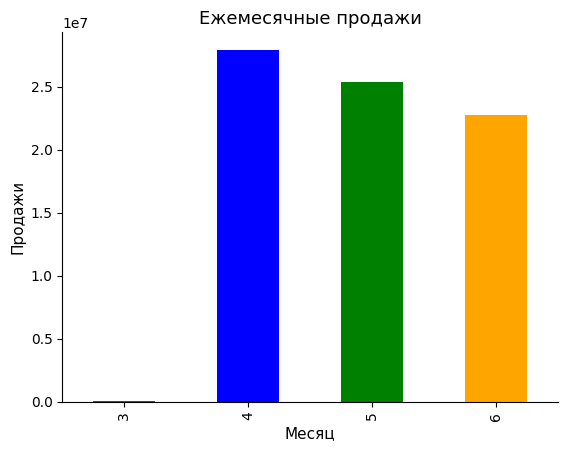

In [146]:
amzn_data.groupby(['Month'])['sales'].sum().plot(kind = 'bar', color = ["red","blue","green","orange"])
plt.title('Ежемесячные продажи' , fontsize = 13)
plt.ylabel("Продажи", fontsize = 11)
plt.xlabel('Месяц' , fontsize = 11)
sns.despine()
plt.show()

In [147]:
print(pd.value_counts(amzn_data['ship-city'])[0:10])

ship-city
BENGALURU    11221
HYDERABAD     8076
MUMBAI        6126
NEW DELHI     5798
CHENNAI       5421
PUNE          3858
KOLKATA       2382
GURUGRAM      1868
THANE         1704
LUCKNOW       1458
Name: count, dtype: int64


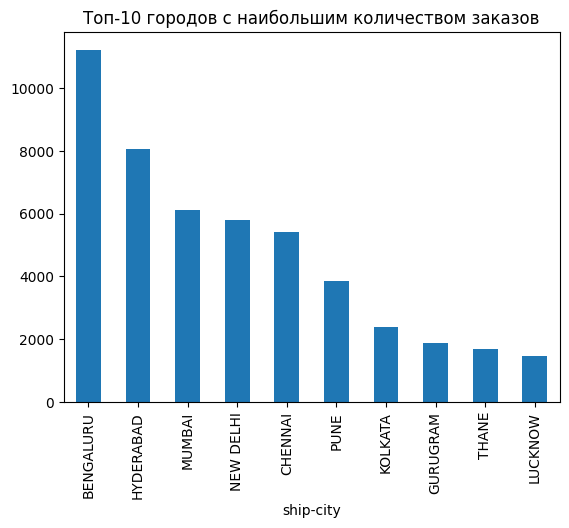

In [148]:
pd.value_counts(amzn_data['ship-city'])[0:10].plot(kind = 'bar')
plt.title('Топ-10 городов с наибольшим количеством заказов')
plt.show()

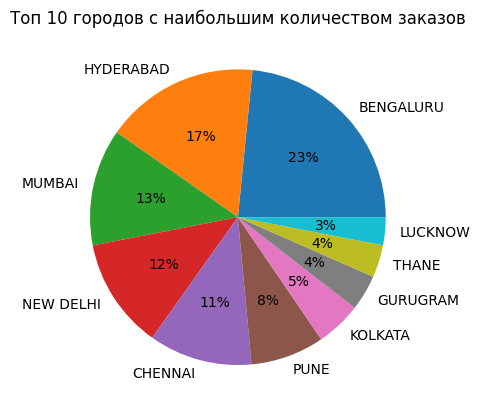

In [149]:
pd.value_counts(amzn_data['ship-city'])[0:10].plot(kind = 'pie' , autopct = '%1.0f%%')
plt.title('Топ 10 городов с наибольшим количеством заказов')
plt.ylabel('')
plt.show()

In [136]:
#products =total_df['Category'].values

Text(0, 0.5, '')

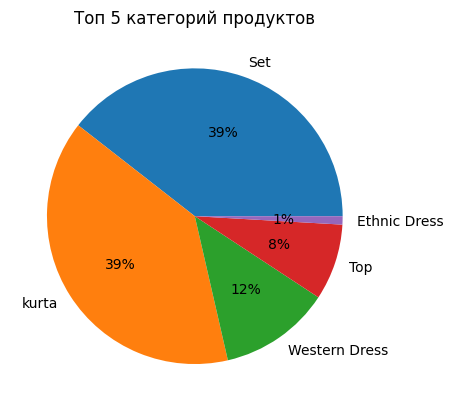

In [150]:
amzn_data['Category'].value_counts()[0:5].plot.pie(autopct = '%1.0f%%')
plt.title('Топ 5 категорий продуктов')
plt.ylabel('')

Text(0, 0.5, '')

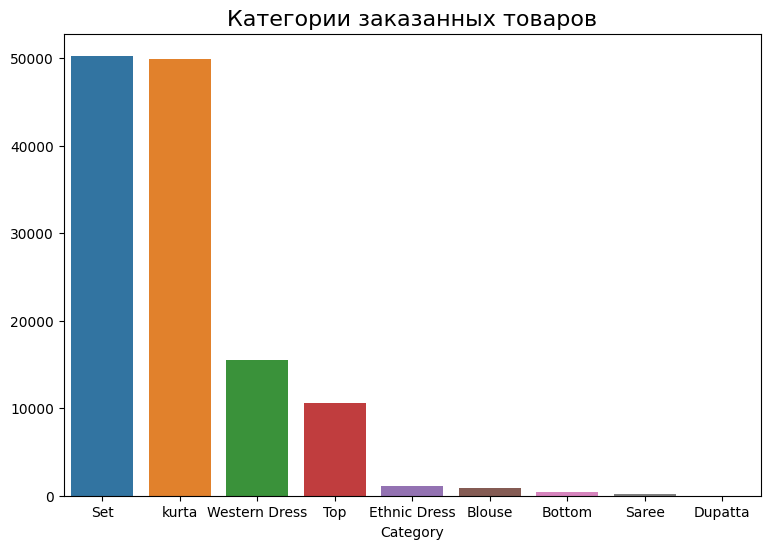

In [151]:
plt.figure(figsize = (9,6))

sns.countplot(x = 'Category', data = amzn_data, order=(amzn_data['Category'].value_counts().index))
plt.title('Категории заказанных товаров', fontsize = 16)
plt.ylabel('')

Всего продажи продукта по категориям:
Category
Set              41,331,310.32
kurta            23,317,614.79
Western Dress    11,744,467.91
Top               5,640,836.30
Ethnic Dress        832,915.52
Blouse              485,454.23
Bottom              162,182.98
Saree               129,529.76
Dupatta                 915.00
Name: Amount, dtype: object




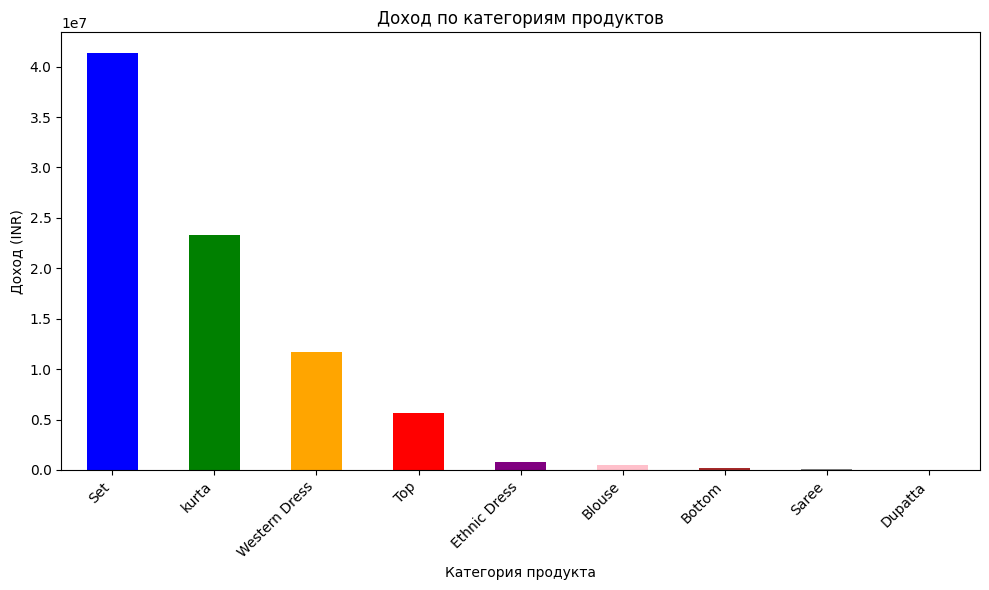

In [152]:
revenue_by_category = amzn_data.groupby('Category')['Amount'].sum().sort_values(ascending=False)
print("Всего продажи продукта по категориям:")
print(revenue_by_category.apply(lambda x: "{:,.2f}".format(x)))
print("\n")

revenue_by_category = revenue_by_category.sort_values(ascending=False)



cores = ['blue', 'green', 'orange', 'red', 'purple', 'pink', 'brown', 'gray']

plt.figure(figsize=(10, 6))
revenue_by_category.plot(kind='bar', xlabel='Категория продукта', ylabel='Доход (INR)', color=cores)
plt.title('Доход по категориям продуктов')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [153]:
s1=amzn_data.Size.value_counts()
s1

Size
M       22711
L       22132
XL      20876
XXL     18096
S       17090
3XL     14816
XS      11161
6XL       738
5XL       550
4XL       427
Free      378
Name: count, dtype: int64

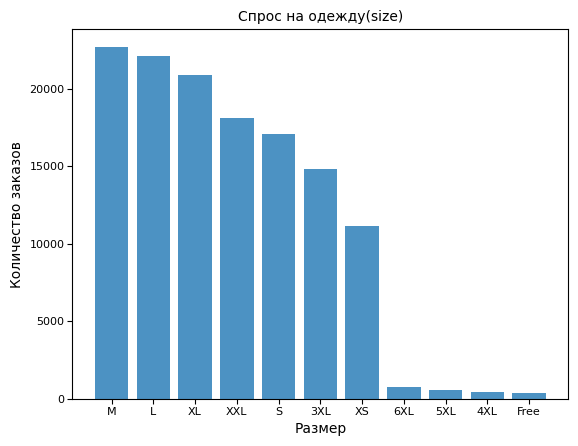

In [154]:
plt.bar(x=amzn_data.Size.value_counts().index,height=d2.Size.value_counts(),alpha=0.8)
plt.xlabel("Размер",fontdict={"size":10,"color":"k"})
plt.ylabel("Количество заказов",fontdict={"size":10,"color":"k"})
plt.title("Спрос на одежду(size)",fontdict={"size":10,"color":"k"})
plt.tick_params(labelsize=8,pad=2)

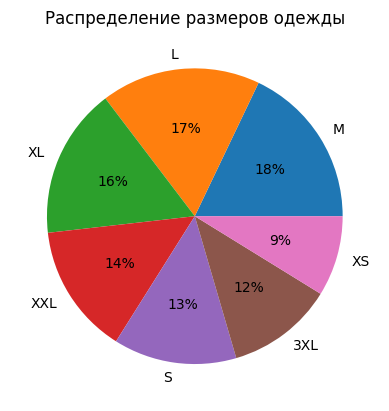

In [157]:
pd.value_counts(amzn_data['Size'])[0:7].plot(kind = 'pie' , autopct = '%1.0f%%')
plt.title('Распределение размеров одежды')
plt.ylabel('')
plt.show()

In [155]:
amzn_data['Status'].value_counts()

Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

In [156]:
amzn_data['Status'].value_counts().sum()

128975

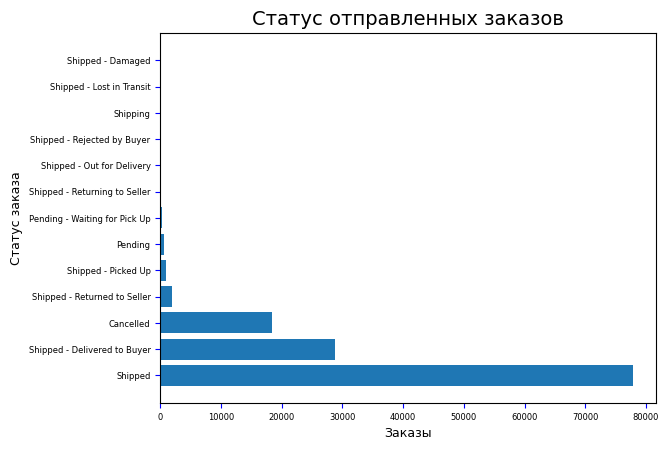

In [70]:
plt.barh(amzn_data['Status'].value_counts().index,d2['Status'].value_counts())
plt.title("Статус отправленных заказов",fontdict={'size':14})
plt.xlabel("Заказы",fontdict={'size':9})
plt.ylabel("Статус заказа",fontdict={'size':9})
plt.tick_params(labelsize=6,color='b')

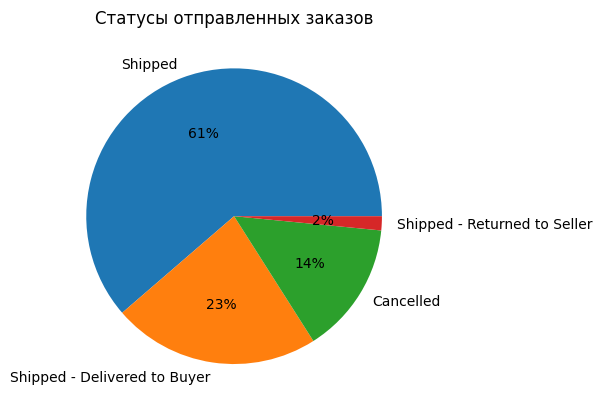

In [158]:
pd.value_counts(amzn_data['Status'])[0:4].plot(kind = 'pie' , autopct = '%1.0f%%')
plt.title('Статусы отправленных заказов')
plt.ylabel('')
plt.show()

In [159]:
import calendar
amzn_data['Month'] = amzn_data['Month'].apply(lambda x: calendar.month_abbr[x])


Text(0.5, 1.0, 'Средняя стоимость заказа за месяц')

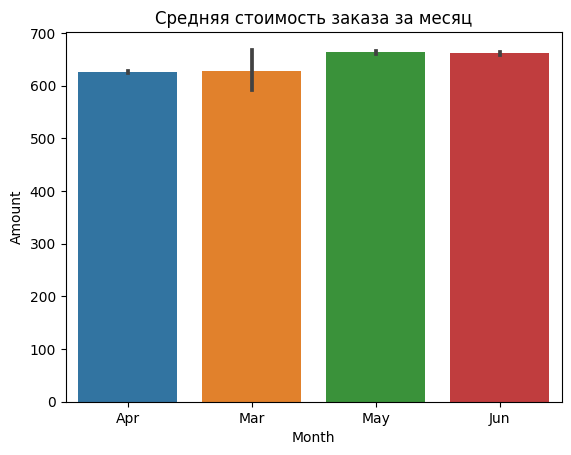

In [160]:
sns.barplot(x='Month',y='Amount',data=amzn_data)
plt.title('Средняя стоимость заказа за месяц')

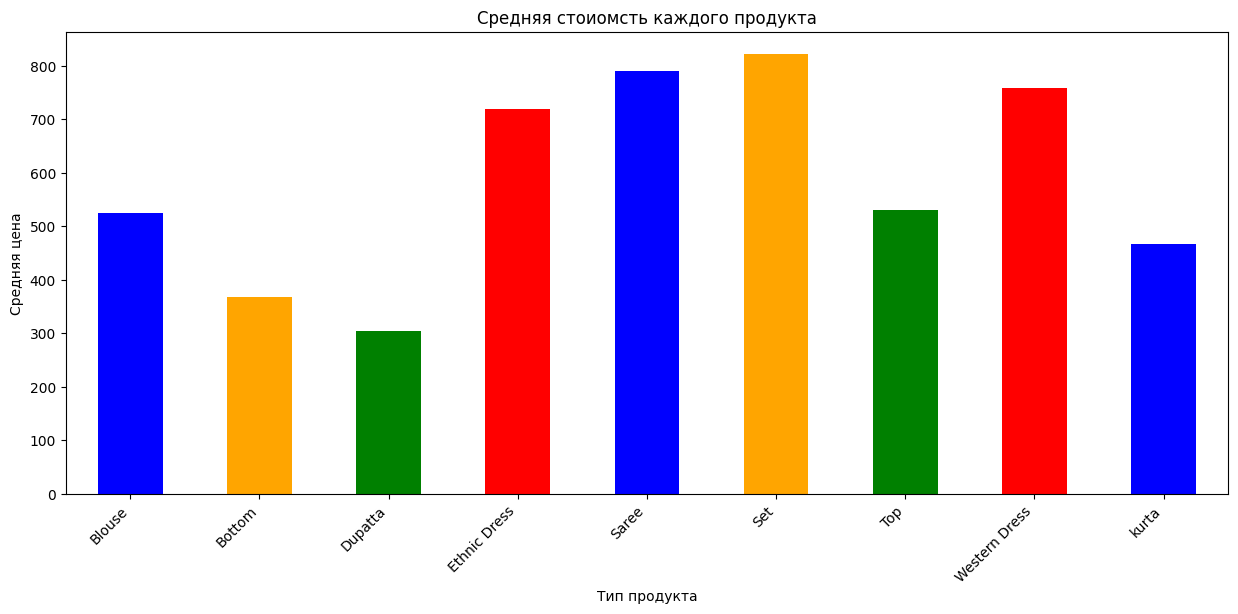

In [161]:
average_price_per_product = amzn_data.groupby('Category')['Amount'].mean()
colors = ['blue', 'orange', 'green', 'red']
# Построение графика
plt.figure(figsize=(15, 6))
average_price_per_product.plot(kind='bar', color = colors)
plt.title('Средняя стоиомсть каждого продукта')
plt.xlabel('Тип продукта')
plt.ylabel('Средняя цена')
plt.xticks(rotation=45, ha='right')  # Поворот подписей по оси X для улучшения читаемости
plt.show()